<h1 style="color:#79A7D3">TITANIC SURVIVAL PREDICTION</h1>

In [182]:
# import imprtant libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style("whitegrid")

In [183]:
# Load the given Data set 
titanic_df = pd.read_csv("./tested.csv")


In [184]:
#Show top five rows of the data sets
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [185]:
# Show five rows from the tail
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [186]:
# Cheking for null values 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [187]:
titanic_df.drop(["PassengerId","Ticket","Age"],axis=1,inplace=True)

In [188]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])
titanic_df["Embarked"]=le.fit_transform(titanic_df["Embarked"])


In [189]:
titanic_df[titanic_df["Fare"].isnull()]


,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked
152,0,3,"Storey, Mr. Thomas",1,0,0,NaN,NaN,2


In [190]:
titanic_df.groupby('Pclass')["Fare"].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [191]:
# replace null values with mean of each column
titanic_df["Fare"].fillna(12.459678, inplace=True)

In [192]:
# Null values in cabin columns
 
cabin_null_per = (titanic_df["Cabin"].isnull().sum())/(titanic_df["Embarked"].count()) *100
print(f"Null value in Cabin column is:{round(cabin_null_per,2)}%")

Null value in Cabin column is:78.23%


In [193]:
# from above we can see that Cabin column has 327 null values 
# I drop the Cabin column
titanic_df = titanic_df.drop("Cabin", axis=1)


In [194]:
titanic_df["Embarked"].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

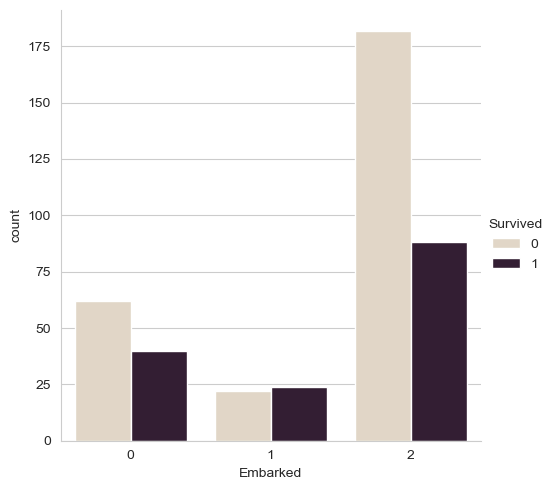

In [195]:
# sns.barplot(data=titanic_df, , hue='Survived')
sns.catplot(data=titanic_df, x='Embarked', kind="count", hue="Survived" ,palette="ch:.25")

<Axes: xlabel='Sex', ylabel='count'>

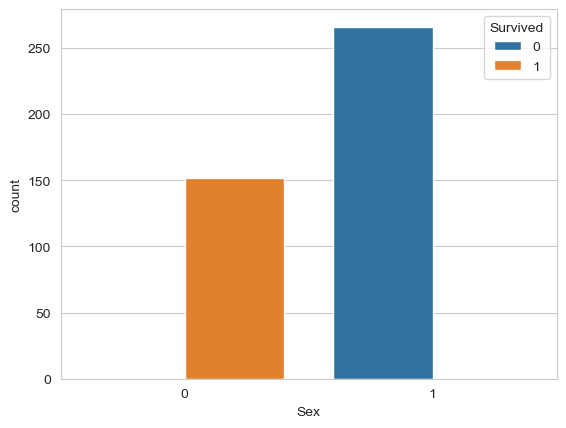

In [196]:
sns.countplot(data=titanic_df,x="Sex", hue="Survived")

In [198]:
X =titanic_df.drop(['Survived','Name'], axis=1)
y = titanic_df["Survived"]

In [199]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [202]:
def test_multiple_models(X, y, cv):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Define the models to test
    models = [
        ("Logistic Regression", LogisticRegression()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Support Vector Machine", SVC()),
        ("xgb",xgb.XGBClassifier(random_state=42)),
        ("AdaBoost",AdaBoostClassifier(n_estimators=100, random_state=42))

    ]

    # Iterate over each model
    for name, model in models:
        # Perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=cv)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model: {name}")
        print("Cross-Validation Accuracy:", scores.mean())
        print("Accuracy:", accuracy)

        report = classification_report(y_test, y_pred)
        print("Classification Report:\n", report)
        print("..."*40);

In [203]:
test_multiple_models(X,y,5)

Model: Logistic Regression
Cross-Validation Accuracy: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

........................................................................................................................
Model: Decision Tree
Cross-Validation Accuracy: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

.......................................